In [23]:
# Importing useful python libraries
import xarray as xr
import threddsclient
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import netCDF4

In [24]:
ds=xr.open_dataset('https://thredds.nilu.no/thredds/dodsC/ebas_doi/VA/U9/WW/VAU9-WW7S.nc')

In [33]:
print(list(ds.variables))

['time', 'time_bnds', 'metadata_time', 'metadata_time_bnds', 'nitrogen_dioxide', 'nitrogen_dioxide_qc', 'nitrogen_dioxide_ebasmetadata']


In [25]:
ds_last=xr.open_dataset('https://thredds.nilu.no/thredds/dodsC/ebas_doi/DQ/83/EQ/DQ83-EQBE.nc')

In [36]:
print(list(ds_last.variables))

['time', 'time_bnds', 'metadata_time', 'metadata_time_bnds', 'nitrogen_dioxide_nmol_per_mol', 'nitrogen_dioxide_nmol_per_mol_qc', 'nitrogen_dioxide_nmol_per_mol_ebasmetadata', 'nitrogen_dioxide_ug_N_per_m3', 'nitrogen_dioxide_ug_N_per_m3_qc', 'nitrogen_dioxide_ug_N_per_m3_ebasmetadata']


In [39]:
ds2_renamed = ds_last.rename({'nitrogen_dioxide_ug_N_per_m3': 'nitrogen_dioxide'})

In [40]:
ds_combined = xr.concat([ds, ds2_renamed], dim='time', )


In [41]:
ds_monthly = ds_combined.resample(time="M").mean()
ds_monthly

/home/mye/anaconda3/envs/actris/lib/python3.12/site-packages/xarray/core/groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


<xarray.Dataset>
Dimensions:                           (metadata_time: 17, time: 204,
                                       nitrogen_dioxide_qc_flags: 1,
                                       nitrogen_dioxide_nmol_per_mol_qc_flags: 1,
                                       nitrogen_dioxide_ug_N_per_m3_qc_flags: 1)
Coordinates:
  * metadata_time                     (metadata_time) datetime64[ns] 2006-07-...
  * time                              (time) datetime64[ns] 2006-01-31 ... 20...
Dimensions without coordinates: nitrogen_dioxide_qc_flags,
                                nitrogen_dioxide_nmol_per_mol_qc_flags,
                                nitrogen_dioxide_ug_N_per_m3_qc_flags
Data variables:
    nitrogen_dioxide                  (time) float64 0.08305 0.09543 ... nan
    nitrogen_dioxide_qc               (time, nitrogen_dioxide_qc_flags) float64 ...
    nitrogen_dioxide_nmol_per_mol     (time) float64 nan nan nan ... 0.08655 nan
    nitrogen_dioxide_nmol_per_mol_qc  (time, nitrogen_dioxide_nmol_per_mol_qc_flags) float64 ...
    nitrogen_dioxide_ug_N_per_m3_qc   (time, nitrogen_dioxide_ug_N_per_m3_qc_flags) float64 ...
Attributes: (12/91)
    Conventions:                   CF-1.8, ACDD-1.3
    featureType:                   timeSeries
    title:                         Nitrogen_dioxide at Jungfraujoch
    keywords:                      GAW-WDCRG, ACTRIS, CH0001G, air, sel_GEOmo...
    id:                            VAU9-WW7S.nc
    naming_authority:              EBAS
    ...                            ...
    geospatial_lat_units:          degrees_north
    geospatial_lon_units:          degrees_east
    comment:                       {\n    "Data definition": "EBAS_1.1",\n   ...
    standard_name_vocabulary:      CF-1.7, ACDD-1.3
    history:                       None
    creator_url:                   ebas.nilu.no

In [45]:
df=pd.DataFrame(ds_monthly.nitrogen_dioxide.values, index=ds_monthly.time.values, columns=['nitrogen_dioxide'])

In [58]:
df_ex=df[df.index.year != 2022]

In [59]:
df['month'] = df.index.month

In [63]:
df_ex=df[df.index.year != 2022]
df_2022=df[df.index.year == 2022]

In [61]:
monthly_stats = df_ex.groupby('month')['nitrogen_dioxide'].describe()

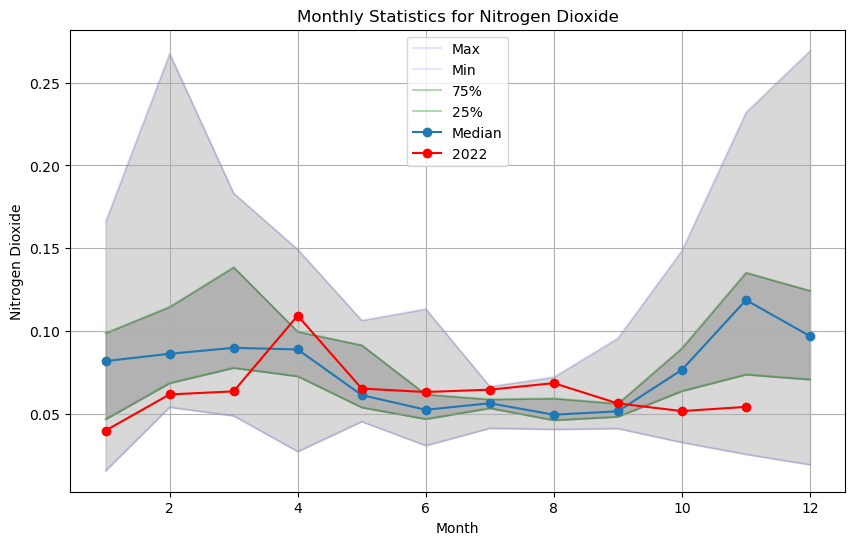

In [70]:
# Extract relevant statistics
months = monthly_stats.index
max_values = monthly_stats['max']
min_values = monthly_stats['min']
q75_values = monthly_stats['75%']
q25_values = monthly_stats['25%']
median_values = monthly_stats['50%']

# Plot the statistics
plt.figure(figsize=(10, 6))
plt.plot(months, max_values, label='Max',color='blue', alpha=0.1)
plt.plot(months, min_values, label='Min',color='blue', alpha=0.1)
plt.plot(months, q75_values, label='75%', color='green', alpha=0.3)
plt.plot(months, q25_values, label='25%', color='green', alpha=0.3)
plt.plot(months, median_values, label='Median', marker='o')
plt.plot(df_2022['month'], df_2022['nitrogen_dioxide'], label='2022', marker='o', color='red')
# Add shaded area between Max and 75%
plt.fill_between(months, q75_values, max_values, color='gray', alpha=0.3)
plt.fill_between(months, q25_values, q75_values, color='gray', alpha=0.6)
# Add shaded area between Max and 75%
plt.fill_between(months, q25_values, min_values, color='gray', alpha=0.3)


plt.xlabel('Month')
plt.ylabel('Nitrogen Dioxide')
plt.title('Monthly Statistics for Nitrogen Dioxide')
plt.legend()
plt.grid(True)
plt.show()